## Observations and Insights 


## The correlation of Average Tunor Volume with Weight in mice treated with Capomulin is : 0.84. There is a strong correlation between weight and tumour volume in mice treated with Capomulin

## There are two potential outliers in the last two timepoints of mouse s185 treated with Capomulin, both values are below 26.714832162499995. The volume of this mouses tumor reduced significantly, for this mouse the Capomulin treatment was very effective.

## The Capomulin Regimen final tumor volume data is less variable than the other three Regimens 


In [108]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np

# Define Variable for study files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [109]:
# have a look at the data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [110]:
# Checking the number of mice in mouse_metadata
# use nunique() to return all of the unique SN values
original_mice = mouse_metadata["Mouse ID"].nunique()
original_mice

249

In [111]:
# have a look at the data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [112]:
# Checking the number of mice in study_results
# use nunique() to return all of the unique Mouse ID values
study_mice = study_results["Mouse ID"].nunique()
study_mice

249

In [113]:
# Combine the data into a single dataset
# Merge two dataframes using an outer join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
# Checking the number of mice in the merged DataFrame.
# use nunique() to return all of the unique Mouse ID values
merged_mice = merge_df["Mouse ID"].nunique()
merged_mice

249

In [115]:
# Checking the number of duplicated mice in the merged DataFrame.
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [116]:
# create a varible called dodgy mice to use when creating the clean_mice dataframe
dodgy_mice=duplicate_mice['Mouse ID'].unique()
dodgy_mice

array(['g989'], dtype=object)

In [117]:
# use loc & isin to locate and create a dataframe that just contains the mouse in the dodgy_mice df and reverse the instruction by adding a bitwise not ~  
clean_mice = merge_df.loc[~merge_df['Mouse ID'].isin(dodgy_mice)]

In [118]:
# view the data
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [119]:
# use loc & isin to locate mice that were treated with this list of Regimen, create a varible to use later
four_drug = clean_mice.loc[clean_mice['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [120]:
# Checking the number of mice in the clean DataFrame.
# use nunique() to return all of the unique Mouse ID values
cleaned_mice = clean_mice["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [121]:
# view the statistics
clean_mice.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [122]:
# view the data
clean_mice["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [123]:
# view the data
clean_mice["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [124]:
# Extract the following columns: "Drug Regimen", "Tumor Volume (mm3)" from the clean mice df for statistical analysis
tumor_volume_df = clean_mice[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_volume_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [125]:
regimen_mean = tumor_volume_df.groupby('Drug Regimen').mean()
regimen_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [126]:
regimen_median = tumor_volume_df.groupby('Drug Regimen').median()
regimen_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [127]:
regimen_var = tumor_volume_df.groupby('Drug Regimen').var()
regimen_var

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [128]:
regimen_std = tumor_volume_df.groupby('Drug Regimen').std()
regimen_std

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [129]:
regimen_sem = tumor_volume_df.groupby('Drug Regimen').sem()
regimen_sem

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [130]:
# Merge two at a time using an outer join
stats_merge = pd.merge(regimen_mean, regimen_median, on="Drug Regimen", how="outer")
# Display the data table for preview
stats_merge

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [131]:
# rename the columns
stats_merge_renamed = stats_merge.rename(columns={"Tumor Volume (mm3)_x": "Mean","Tumor Volume (mm3)_y": "Median",})
stats_merge_renamed

,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [132]:
# merge again
stats_merge1 = pd.merge(stats_merge_renamed, regimen_var, on="Drug Regimen", how="outer")
# Display the data table for preview
stats_merge1

,Mean,Median,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.320930,50.446266,43.852013
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [133]:
# merge again
stats_merge2 = pd.merge(stats_merge1, regimen_std, on="Drug Regimen", how="outer")
# Display the data table for preview
stats_merge2

,Mean,Median,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [134]:
# merge for the last time
stats_merge3 = pd.merge(stats_merge2, regimen_sem, on="Drug Regimen", how="outer")
# Display the data table for preview
stats_merge3

,Mean,Median,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [135]:
# Rename the remaing columns
stats_summary = stats_merge3.rename(columns={"Tumor Volume (mm3)_x": "Varience","Tumor Volume (mm3)_y": "Std Deviation", "Tumor Volume (mm3)": "SEM"})


In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_summary

,Mean,Median,Varience,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [137]:
# Using the aggregation method, produce the same summary statistics in a single line
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_sem_df = clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem'] })
grouped_sem_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [138]:
# view the columns
clean_mice['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [139]:
# create series to use for the bar plot 
timepoint_df = clean_mice['Drug Regimen'].value_counts()
timepoint_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [140]:
# view the array for drug regimens (x axis) 
timepoint_df.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [141]:
# view the array for timepoints (y axis) 
timepoint_df.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [142]:
#  Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot.
# define the variables 
drugs = timepoint_df.index.values
timepoints = timepoint_df.values
x_axis = np.arange(len(timepoints))

<IPython.core.display.Javascript object>


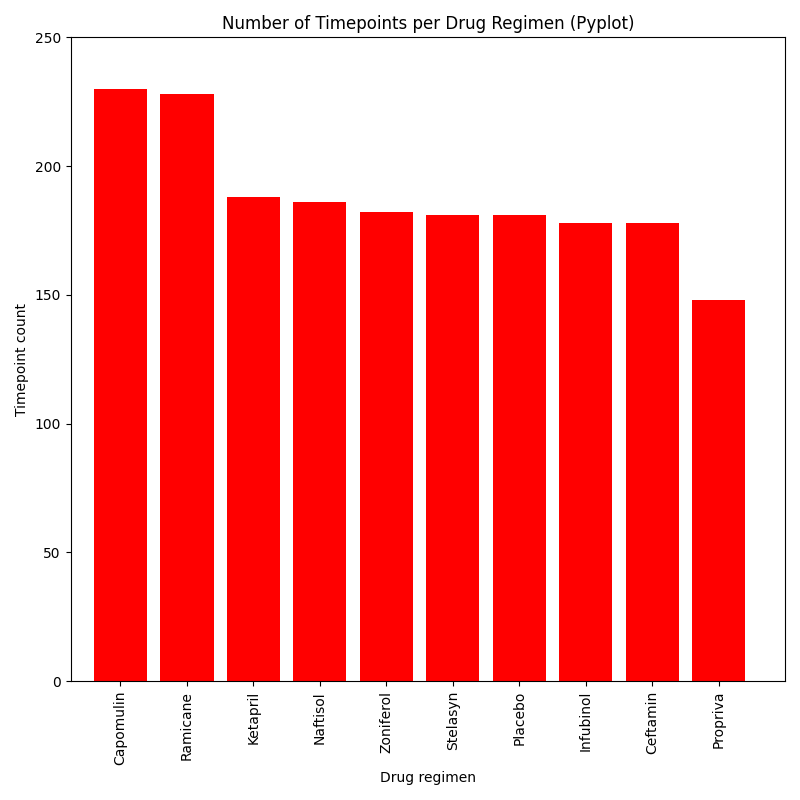

<BarContainer object of 10 artists>

In [143]:
# plot the bar chart 
plt.figure(figsize=(8,8))
plt.bar(x_axis, timepoints, color="r", align="center")

In [144]:
# create a variable for the tick locations on the x axis (drugs) and set the rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")

([<matplotlib.axis.XTick at 0x1c8ec6af550>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

In [145]:
# set the limit of the x axis to position the bars within the chart
plt.xlim(-0.75, len(x_axis))

(-0.75, 10.0)

In [146]:
# set the limit of the y axis to position the top of the bars within the chart
plt.ylim(0, max(timepoints)+20)

(0.0, 250.0)

In [147]:
# add the titles
plt.title("Number of Timepoints per Drug Regimen (Pyplot)")
plt.xlabel("Drug regimen")
plt.ylabel("Timepoint count")

Text(58.347222222222214, 0.5, 'Timepoint count')

In [148]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot
plt.tight_layout()
plt.savefig("../Images/Number_of_Timepoints_per_Drug_Regimen_Pyplot")

In [ ]:
#  Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [149]:
#  Create an array that contains the number of Timepoints each drug regimen has
P_timepoints =(clean_mice.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
P_timepoints

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

<IPython.core.display.Javascript object>


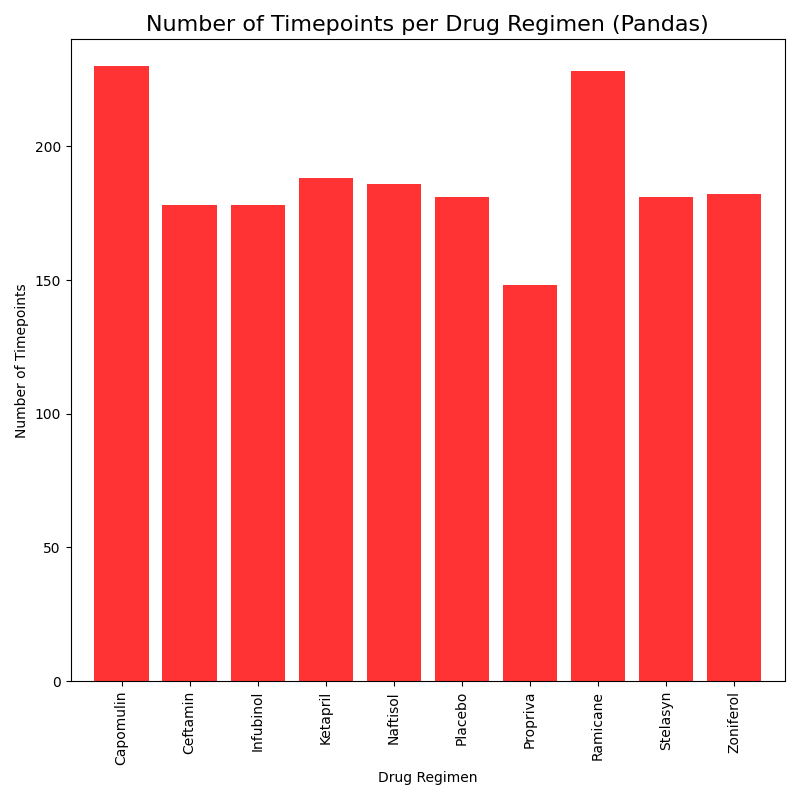

In [150]:
#  Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = np.arange(len(P_timepoints))
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.bar(x_axis, P_timepoints, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(P_timepoints)+10)

plt.title("Number of Timepoints per Drug Regimen (Pandas)",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Timepoints",fontsize = 10)

plt.tight_layout()
plt.savefig("../Images/Number_of_Timepoints_per_Drug_Regimen_Pandas")

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [151]:
#  Group mice by sex to create a dataframe to use to plot the distribution

group_by_sex = clean_mice.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(group_by_sex.size())

# Create the dataframe with total count of Female and Male mice
gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["QTY"]

# caclcualte percentage of male and female mice
gender["%"] = (100*(gender["QTY"]/gender["QTY"].sum()))

# create gender data frame
gender

,QTY,%
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


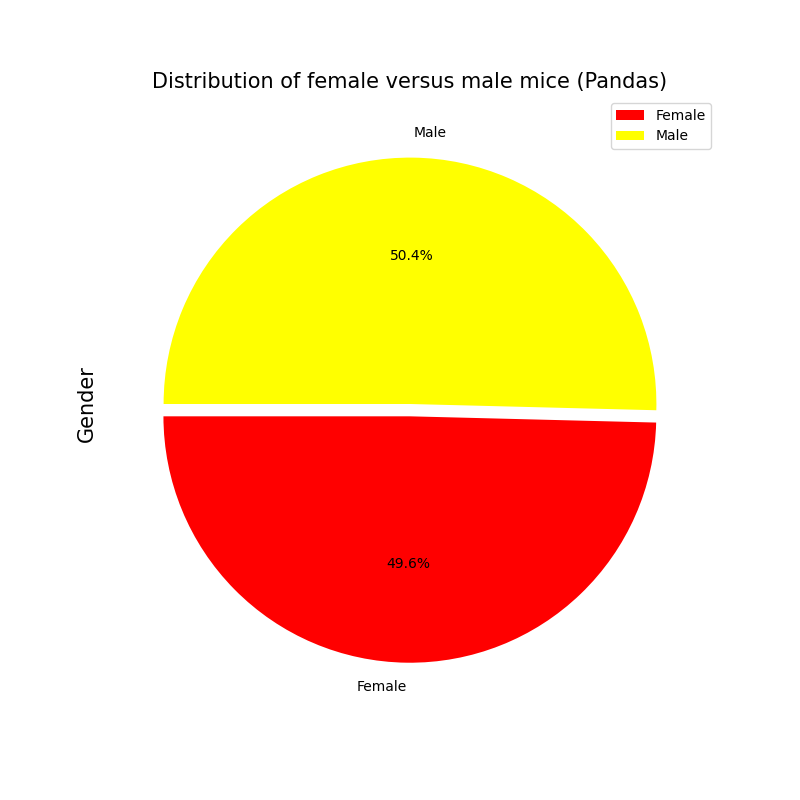

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['red', 'yellow']
explode = (0.05, 0)
plot = gender.plot.pie(y='QTY',figsize=(8,8), colors = colors, startangle=180, explode = explode, shadow = False, autopct="%1.1f%%")

plt.title('Distribution of female versus male mice (Pandas)',fontsize = 15)
plt.ylabel('Gender',fontsize = 15)

plt.savefig("../Images/pandas_dist.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


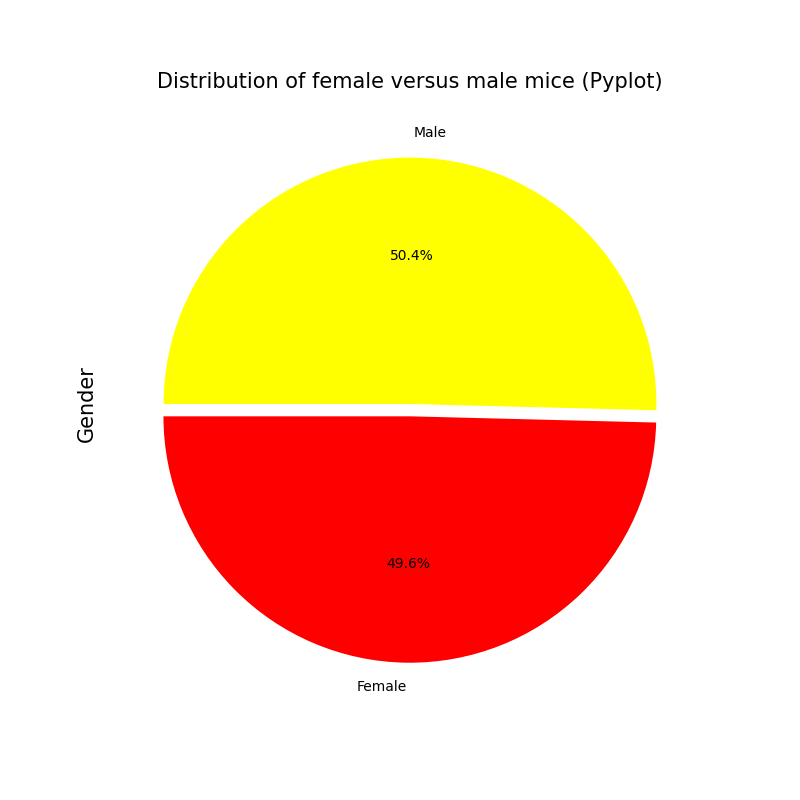

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create the Labels
labels = ["Female","Male"]

# List the values
sizes = [49.596774,50.403226]

# Set the colors
colors = ['red', 'yellow']

# Set the explode
explode = (0.05, 0)

# Create the pie chart
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180,)
plt.title('Distribution of female versus male mice (Pyplot)',fontsize = 15)
plt.ylabel('Gender',fontsize = 15)

#plt.axis("equal",fontsize = 15)

plt.savefig("../Images/pyplot_dist.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [154]:
# review the data
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# review the data
qty_mice = clean_mice["Mouse ID"].nunique()
qty_mice

248

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# use the previosly created dataframe
four_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [157]:
# Check the total qty of mice using Capomulin, Ramicane, Infubinol, and Ceftamin
qty_mice1 = four_drug["Mouse ID"].nunique()
qty_mice1

100

In [158]:
# find the last timepoint for the mice using Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = four_drug.groupby('Mouse ID').max()['Timepoint']
last_timepoint
# validate that this df is the same length

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [159]:
# Merge these to get the tumor volume at the last timepoint
merge_last_timepoint_tumor = pd.merge(four_drug, last_timepoint, on=["Mouse ID", "Timepoint"], how="inner")                                           
merge_last_timepoint_tumor
len(merge_last_timepoint_tumor)

100

In [160]:
# take a look at the statistics
merge_last_timepoint_tumor.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,13.520000,23.710000,35.700000,47.197795,1.45000
std,7.608448,4.472802,14.442852,12.953884,1.14922
min,1.000000,15.000000,0.000000,22.050126,0.00000
25%,7.000000,20.000000,30.000000,37.187744,1.00000
50%,15.000000,25.000000,45.000000,45.000000,1.00000
75%,20.000000,27.250000,45.000000,59.930262,2.00000
max,24.000000,30.000000,45.000000,72.226731,4.00000


In [161]:
# create a df for each drug regimen
Capomulin = clean_mice.loc[clean_mice['Drug Regimen'].isin(['Capomulin'])]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [162]:
# Determine if there are any potential outliers
quartiles = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Capomulin the lower quartile of Tumor Volume is: {lowerq}")
print(f"For Capomulin the upper quartile of Tumor Volume is: {upperq}")
print(f"For Capomulin the interquartile range of Tumor Volume is: {iqr}")
print(f"For Capomulin the the median of Tumor Volume is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin_outlier_Tumor_Volume = Capomulin.loc[(Capomulin['Tumor Volume (mm3)'] < lower_bound) | (Capomulin['Tumor Volume (mm3)'] > upper_bound)]
Capomulin_outlier_Tumor_Volume
# There are two potential outliers in the last two timepoints of mouse s185

For Capomulin the lower quartile of Tumor Volume is: 37.685932865
For Capomulin the upper quartile of Tumor Volume is: 45.0
For Capomulin the interquartile range of Tumor Volume is: 7.314067135000002
For Capomulin the the median of Tumor Volume is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [163]:
Ceftamin = clean_mice.loc[clean_mice['Drug Regimen'].isin(['Ceftamin'])]
Ceftamin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [164]:
# Determine if there are any potential outliers
quartiles = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Ceftamin the lower quartile of Tumor Volume is: {lowerq}")
print(f"For Ceftamin the upper quartile of Tumor Volume is: {upperq}")
print(f"For Ceftamin the interquartile range of Tumor Volume is: {iqr}")
print(f"For Ceftamin the the median of Tumor Volume is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin_outlier_Tumor_Volume = Ceftamin.loc[(Ceftamin['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin['Tumor Volume (mm3)'] > upper_bound)]
Ceftamin_outlier_Tumor_Volume
# There are no potential outliers

For Ceftamin the lower quartile of Tumor Volume is: 47.2084271125
For Ceftamin the upper quartile of Tumor Volume is: 56.801437570000004
For Ceftamin the interquartile range of Tumor Volume is: 9.593010457500007
For Ceftamin the the median of Tumor Volume is: 51.77615728
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [165]:
Ramicane = clean_mice.loc[clean_mice['Drug Regimen'].isin(['Ramicane'])]
Ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [166]:
# Determine if there are any potential outliers
quartiles = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Ramicane the lower quartile of Tumor Volume is: {lowerq}")
print(f"For Ramicane the upper quartile of Tumor Volume is: {upperq}")
print(f"For Ramicane the interquartile range of Tumor Volume is: {iqr}")
print(f"For Ramicane the the median of Tumor Volume is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane_outlier_Tumor_Volume = Ramicane.loc[(Ramicane['Tumor Volume (mm3)'] < lower_bound) | (Ramicane['Tumor Volume (mm3)'] > upper_bound)]
Ramicane_outlier_Tumor_Volume
# k403 is a potential outliers

For Ramicane the lower quartile of Tumor Volume is: 36.674634585
For Ramicane the upper quartile of Tumor Volume is: 45.0
For Ramicane the interquartile range of Tumor Volume is: 8.325365415
For Ramicane the the median of Tumor Volume is: 40.67323554
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [167]:
Infubinol = clean_mice.loc[clean_mice['Drug Regimen'].isin(['Infubinol'])]
Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [168]:
# Determine if there are any potential outliers
quartiles = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol the lower quartile of Tumor Volume is: {lowerq}")
print(f"For Infubinol the upper quartile of Tumor Volume is: {upperq}")
print(f"For Infubinol the interquartile range of Tumor Volume is: {iqr}")
print(f"For Infubinol the the median of Tumor Volume is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol_outlier_Tumor_Volume = Infubinol.loc[(Infubinol['Tumor Volume (mm3)'] < lower_bound) | (Infubinol['Tumor Volume (mm3)'] > upper_bound)]
Infubinol_outlier_Tumor_Volume
# There are no potential outliers

For Infubinol the lower quartile of Tumor Volume is: 47.3123533
For Infubinol the upper quartile of Tumor Volume is: 57.314443967500004
For Infubinol the interquartile range of Tumor Volume is: 10.002090667500006
For Infubinol the the median of Tumor Volume is: 51.82058438
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [169]:
# Merged df prepared earlier showing the tumor volume at the last timepoint for all mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin
                                      
box_plot_df = merge_last_timepoint_tumor
box_plot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
group_by_Regimen = box_plot_df[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)",]]
group_by_Regimen

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,x822,Ceftamin,61.386660
96,y163,Infubinol,67.685569
97,y769,Ceftamin,68.594745
98,y865,Ceftamin,64.729837


In [171]:
# prepare the data for the box plot
Capomulin_bp = group_by_Regimen.loc[group_by_Regimen['Drug Regimen'].isin(['Capomulin'])]
Capomulin_bp1 = Capomulin_bp['Tumor Volume (mm3)']
Capomulin_bp1.values

array([23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294,
       31.8962384 , 32.37735684, 33.32909778, 34.45529799, 37.31184577,
       36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774,
       38.75326548, 38.1251644 , 39.95234669, 40.65812366, 40.1592203 ,
       40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617])

In [172]:
# prepare the data for the box plot
Infubinol_bp = group_by_Regimen.loc[group_by_Regimen['Drug Regimen'].isin(['Infubinol'])]
Infubinol_bp1 = Infubinol_bp['Tumor Volume (mm3)']
Infubinol_bp1.values

array([67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309 ,
       36.3213458 , 60.96971133, 62.43540402, 60.91876652, 67.28962147,
       66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846,
       45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769,
       51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141])

In [173]:
# prepare the data for the box plot
Ramicane_bp = group_by_Regimen.loc[group_by_Regimen['Drug Regimen'].isin(['Ramicane'])]
Ramicane_bp1 = Ramicane_bp['Tumor Volume (mm3)']
Ramicane_bp1.values

array([22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575,
       31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217,
       36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229,
       37.31123552, 38.34200823, 38.4076183 , 40.65900627, 40.66771292,
       45.22086888, 43.0475426 , 43.41938077, 43.16637266, 44.18345092])

In [174]:
# prepare the data for the box plot
Ceftamin_bp = group_by_Regimen.loc[group_by_Regimen['Drug Regimen'].isin(['Ceftamin'])]
Ceftamin_bp1 = Ceftamin_bp['Tumor Volume (mm3)']
Ceftamin_bp1.values

array([62.99935619, 45.        , 56.05774909, 55.74282869, 48.72207785,
       47.7846818 , 61.84902336, 68.92318457, 67.74866174, 57.91838132,
       46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223,
       64.19234114, 45.        , 52.92534846, 45.        , 67.52748237,
       45.        , 64.63494887, 61.38666032, 68.59474498, 64.72983655])

In [71]:
# combine the arrays in to a list of arrays
data_to_plot = [Capomulin_bp1, Infubinol_bp1, Ramicane_bp1, Ceftamin_bp1]
data_to_plot

[1     23.343598
 2     28.484033
 3     28.430964
 6     30.485985
 10    31.023923
 12    31.896238
 13    32.377357
 14    33.329098
 16    34.455298
 20    37.311846
 22    36.041047
 24    37.074024
 28    38.846876
 30    38.939633
 31    38.982878
 32    38.753265
 34    38.125164
 35    39.952347
 36    40.658124
 37    40.159220
 38    40.728578
 39    41.483008
 40    41.581521
 45    47.685963
 82    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 49    67.973419
 50    65.525743
 52    57.031862
 53    66.083066
 57    72.226731
 58    36.321346
 59    60.969711
 60    62.435404
 61    60.918767
 64    67.289621
 67    66.196912
 68    62.117279
 74    47.010364
 75    60.165180
 77    55.629428
 78    45.699331
 80    54.656549
 83    55.650681
 87    46.250112
 88    54.048608
 89    51.542431
 91    50.005138
 92    58.268442
 96    67.685569
 99    62.754451
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564

<IPython.core.display.Javascript object>


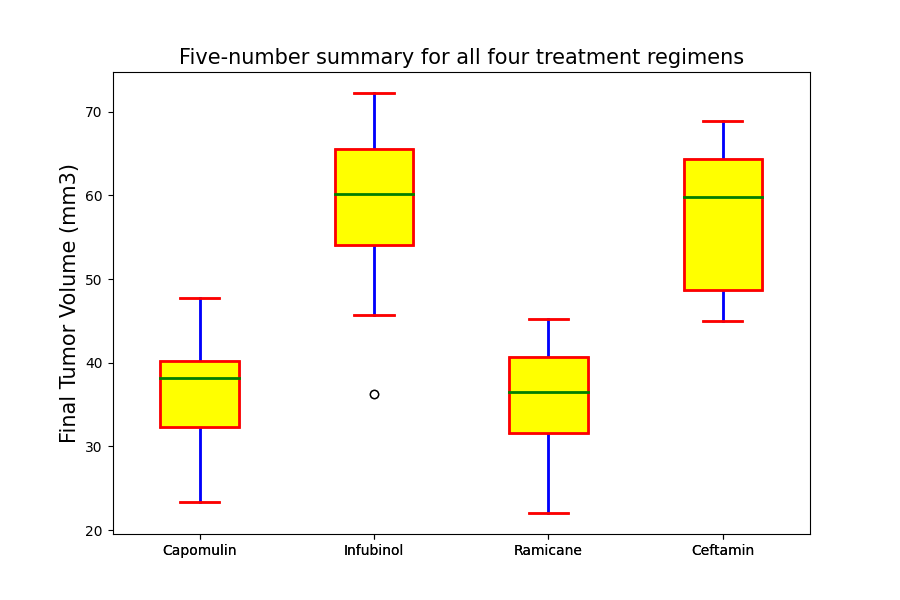

In [175]:
# Create the blank plot
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='red', linewidth=2)
    # change fill color
    box.set( facecolor = 'yellow' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='red', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='green', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='blue', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['', '', '', '','Capomulin' ,'Infubinol' ,'Ramicane','Ceftamin'])
plt.title('Five-number summary for all four treatment regimens',fontsize = 15)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 15)

# Save the plot to the images folder
plt.savefig("../Images/boxplot_tv.png", bbox_inches = "tight")
plt.show()




## Line and Scatter Plots

In [176]:
# Reduce the four_drug df to just mice treated with Capomulin
Capomulin_tp = four_drug.loc[four_drug['Drug Regimen'].isin(['Capomulin'])]

# Extract the following columns: "Mouse_ID", "Tumor Volume (mm3)" and "Timepoint" from the Campolin_tp df
line_plot_df = Capomulin_tp[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Reduce the line_plot df to just one mouse treated with Capomulin
s185_tp = line_plot_df.loc[line_plot_df["Mouse ID"].isin(['s185'])]
TV = s185_tp["Tumor Volume (mm3)"]
TV.values

array([45.        , 43.87849569, 37.61494768, 38.17723195, 36.86687576,
       33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787])

In [177]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Set x axis and variable
x_data = np.arange(0, 50, 5)
x_data

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

<IPython.core.display.Javascript object>


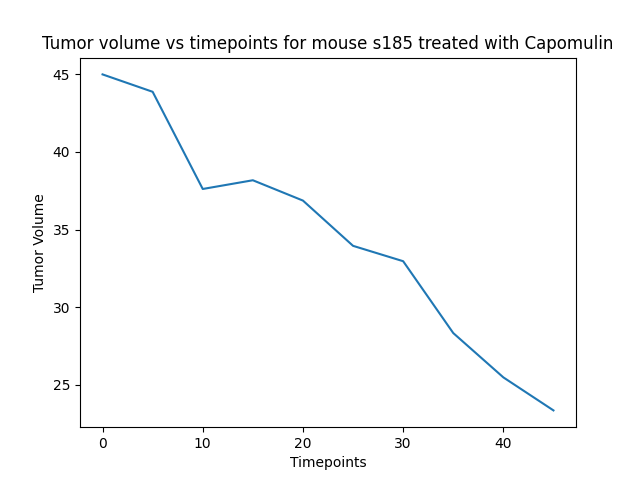

In [178]:
plt.title("Tumor volume vs timepoints for mouse s185 treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")

plt.plot(x_data,TV)
plt.show()
plt.savefig("../Images/Tumor_volume_vs_timepoint_Capomulin")

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [180]:
Capomulin.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [181]:
# Normalise the mouse weight data by calculating the average in case in future studies mouse weight is recaorded, return the Average weight of each mouse
Mouse_avg_w=Capomulin.groupby("Mouse ID").mean()["Weight (g)"].rename("Average Weight (g)")
Mouse_avg_w.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Average Weight (g), dtype: float64

In [182]:
# calculate and return the Average Tumor volume of each mouse
Mouse_avg_tv=Capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"].rename("Average Tumor Volume (mm3)")
Mouse_avg_tv.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Average Tumor Volume (mm3), dtype: float64

In [183]:
# merge the two data frames output the result
sp_result=pd.merge(Mouse_avg_w,Mouse_avg_tv,how="inner",on="Mouse ID")
sp_result

,Average Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


<IPython.core.display.Javascript object>


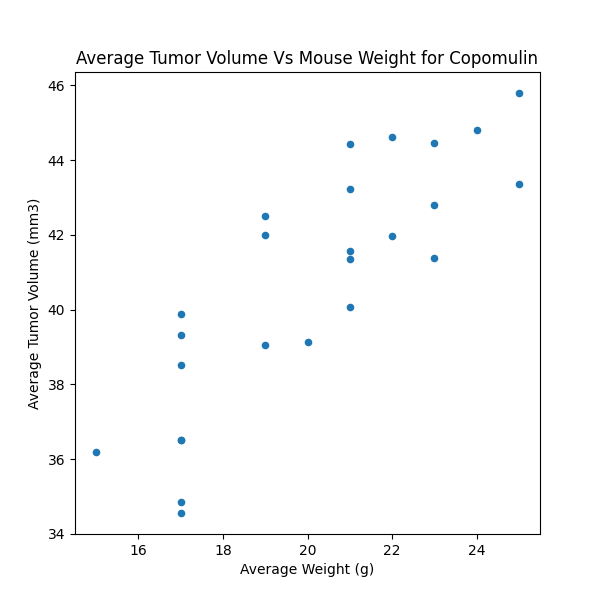

<AxesSubplot:title={'center':'Average Tumor Volume Vs Mouse Weight for Copomulin'}, xlabel='Average Weight (g)', ylabel='Average Tumor Volume (mm3)'>

In [184]:
# Create a scatter plot which compares average tumor volume vs. mouse weight for the Capomulin regimen
sp_result.plot(kind="scatter", x="Average Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,6), title="Average Tumor Volume Vs Mouse Weight for Copomulin")

## Correlation and Regression

In [185]:
# veiw the varible columns
sp_result.columns

Index(['Average Weight (g)', 'Average Tumor Volume (mm3)'], dtype='object')

In [186]:
# Get columns
Avg_Weight = sp_result["Average Weight (g)"]
Avg_Tumor_Vol = sp_result["Average Tumor Volume (mm3)"]
# Compute correlation and print
corr_1, _ = sts.pearsonr(Avg_Tumor_Vol,Avg_Weight )
print(f"The correlation of Average Tunor Volume with Weight in mice treated with Capomulin is : {round(corr_1, 2)}")

# There is a strong correlation between weight and tumour volume in mice treated with Capomulin

The correlation of Average Tunor Volume with Weight in mice treated with Capomulin is : 0.84


<IPython.core.display.Javascript object>


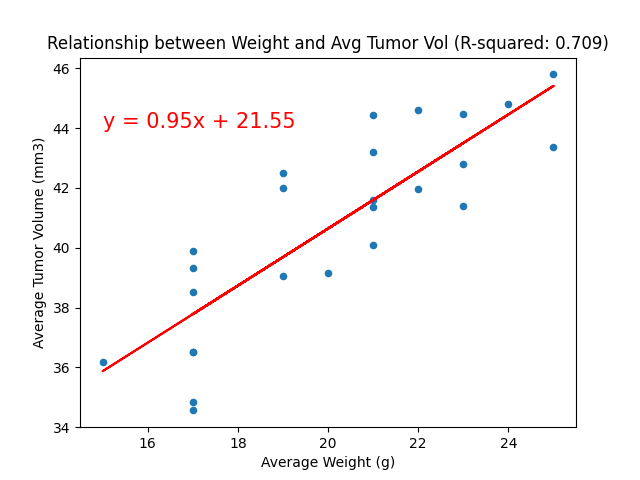

In [187]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Plot out Avg Weight versus Avg Tumour Volume
sp_result.plot(kind="scatter", x="Average Weight (g)", y="Average Tumor Volume (mm3)")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Define scatter values for x and y axis
x_values = sp_result['Average Weight (g)']
y_values = sp_result['Average Tumor Volume (mm3)']

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept


plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
            

# Add title with the value for the r-squared
plt.title(f"Relationship between Weight and Avg Tumor Vol (R-squared: {round(rvalue**2, 3)})")

plt.show()